# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a meetup dataset for events occurring in Nashville.

## Objectives

You will be able to:
* Cluster a social network into subgroups

## Load the Dataset

To start, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [1]:
#Your code here

import pandas as pd

data = pd.read_csv('nashville-meetup/group-edges.csv')
data.head()

,Unnamed: 0,group1,group2,weight
0,0,19292162,535553,2
1,1,19292162,19194894,1
2,2,19292162,19728145,1
3,3,19292162,18850080,2
4,4,19292162,1728035,1


To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [2]:
#Your code here
desc = pd.read_csv('nashville-meetup/meta-groups.csv')
desc.head()

,group_id,group_name,num_members,category_id,category_name,organizer_id,group_urlname
0,339011,Nashville Hiking Meetup,15838,23,Outdoors & Adventure,4353803,nashville-hiking
1,19728145,Stepping Out Social Dance Meetup,1778,5,Dancing,118484462,steppingoutsocialdance
2,6335372,Nashville soccer,2869,32,Sports & Recreation,108448302,Nashville-soccer
3,10016242,NashJS,1975,34,Tech,8111102,nashjs
4,21174496,20's & 30's Women looking for girlfriends,2782,31,Socializing,184580248,new-friends-in-Nashville


## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [9]:
data.iloc[data.index[0]]

Unnamed: 0           0
group1        19292162
group2          535553
weight               2
Name: 0, dtype: int64

In [11]:
#Your code here
import networkx as nx

group_titles = dict(zip(desc.group_id, desc.group_name))
G = nx.Graph()

for row in data.index:
    group1 = group_titles[data.group1[row]]
    group2 = group_titles[data.group2[row]]
    weight = data.weight[row]
    G.add_edge(group1,group2, weight = weight)

## Visualize the Network

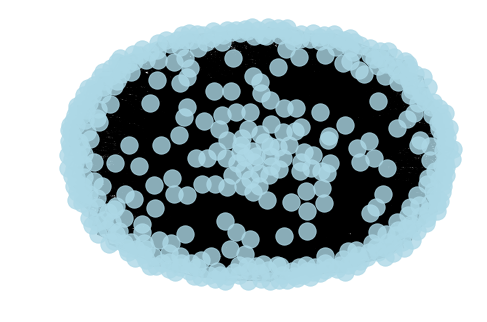

In [13]:
#Your code here

import matplotlib.pyplot as plt

nx.draw(G, pos = nx.spring_layout(G, k = 2, random_state = 5), alpha = .8, node_color = 'lightblue')

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

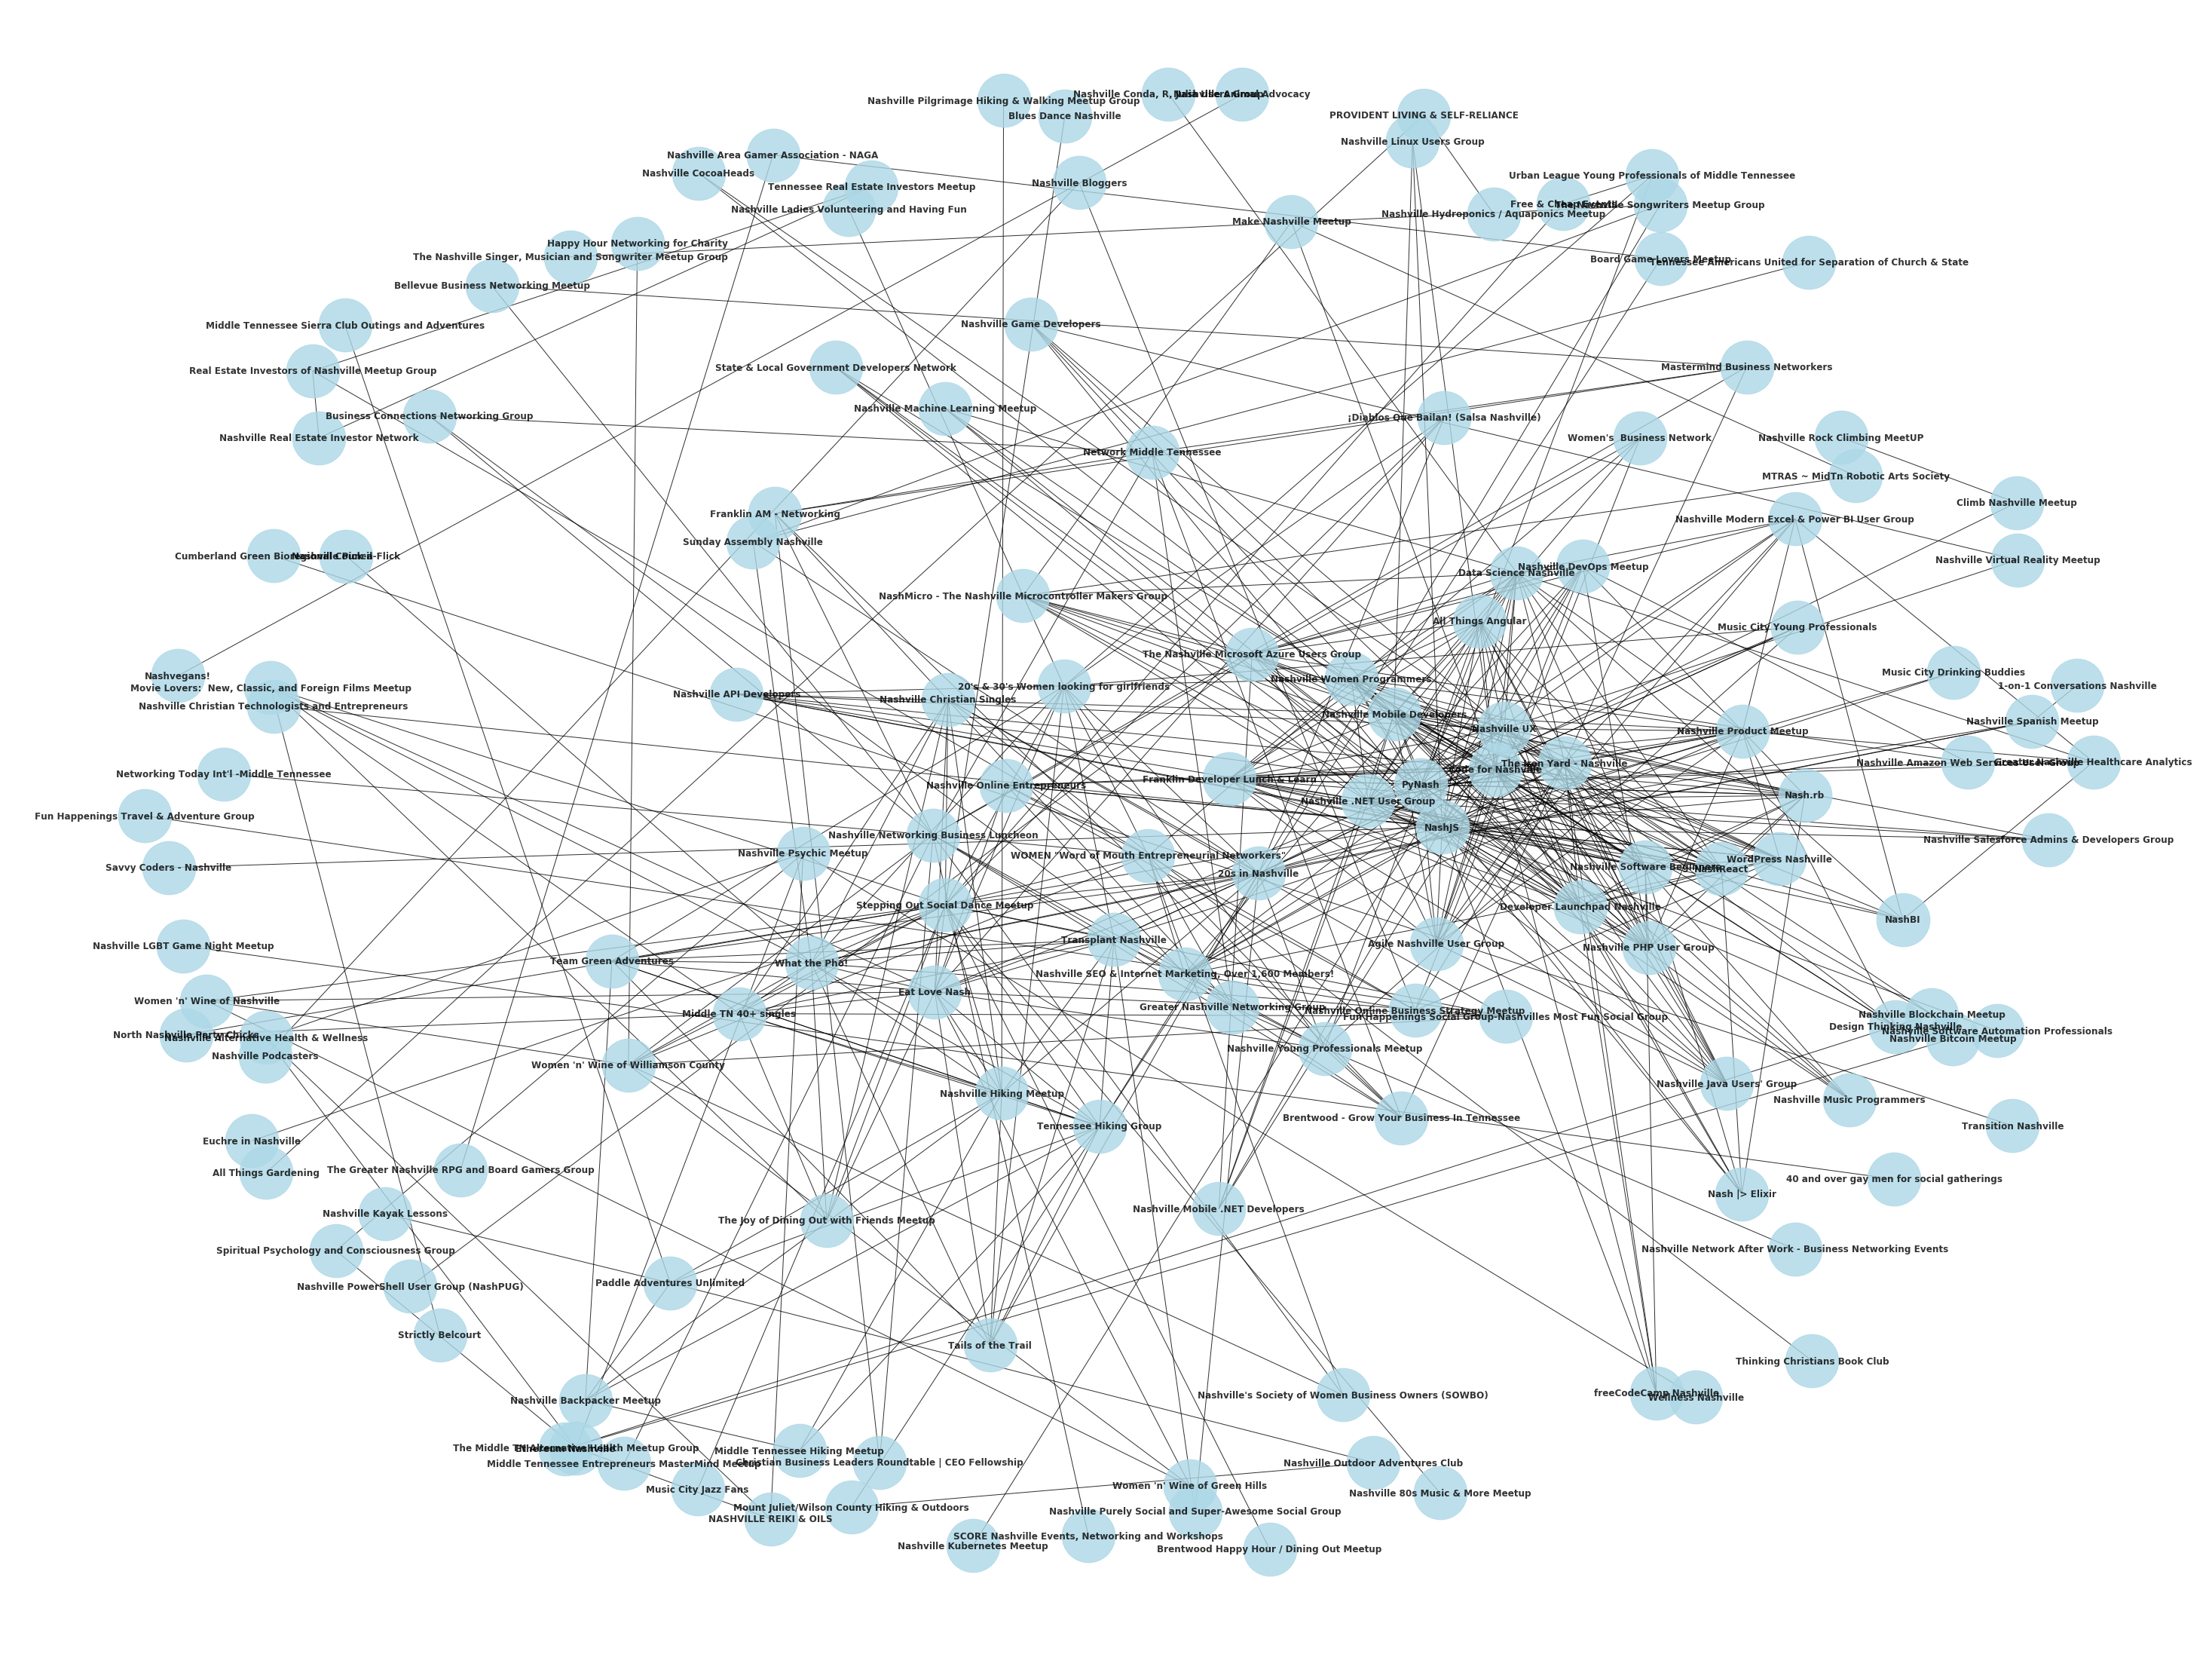

In [14]:
#Your code here

threshold = 5
G_revised = nx.Graph()

for row in data.index:
    group1 = group_titles[data.group1[row]]
    group2 = group_titles[data.group2[row]]
    weight = data.weight[row]
    if weight > threshold:
        G_revised.add_edge(group1,group2, weight = weight)

plt.figure(figsize = (40,30))

nx.draw(G_revised, pos = nx.spring_layout(G_revised, k = 2, random_state = 5),
       alpha = .8, node_color = 'lightblue', node_size = 5000, with_labels = True, font_size = 12,
       font_weight = 'bold')


## Try Clustering the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [18]:
#Your code here

gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_revised))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, {} clusters remain'.format(n, len(clusters)))

After removing 0 edges, 7 clusters remain
After removing 1 edges, 8 clusters remain
After removing 2 edges, 9 clusters remain
After removing 3 edges, 10 clusters remain
After removing 4 edges, 11 clusters remain
After removing 5 edges, 12 clusters remain
After removing 6 edges, 13 clusters remain
After removing 7 edges, 14 clusters remain
After removing 8 edges, 15 clusters remain
After removing 9 edges, 16 clusters remain
After removing 10 edges, 17 clusters remain
After removing 11 edges, 18 clusters remain
After removing 12 edges, 19 clusters remain
After removing 13 edges, 20 clusters remain
After removing 14 edges, 21 clusters remain
After removing 15 edges, 22 clusters remain
After removing 16 edges, 23 clusters remain
After removing 17 edges, 24 clusters remain
After removing 18 edges, 25 clusters remain
After removing 19 edges, 26 clusters remain
After removing 20 edges, 27 clusters remain
After removing 21 edges, 28 clusters remain
After removing 22 edges, 29 clusters remain
A

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

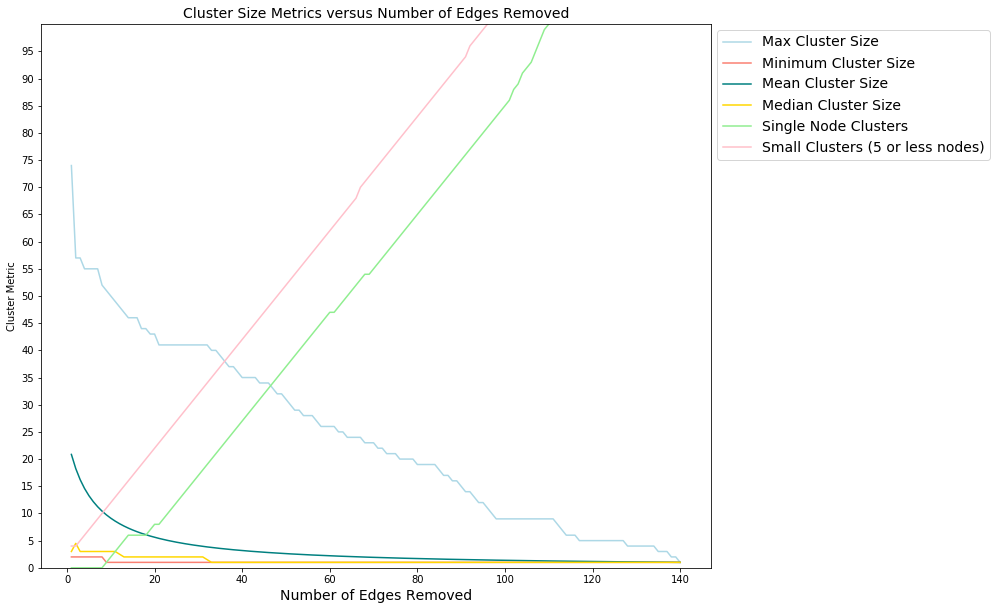

In [22]:
#Your code
import numpy as np
x = np.array(range(len(gn_clusters)))
x += 1
colors = ['lightblue', 'salmon', 'teal', 'gold', 'lightgreen', 'pink']


plt.figure(figsize=(12,10))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[4], label='Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,100)
plt.yticks(list(range(0,100,5)))
plt.show()


#20 looks good

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

In [ ]:
#Your code here

def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(35,20))
    colors = ["#1cf0c7","#ffd43d","#00b3e6","#32cefe","#efefef",
          "#1443ff","#a6cee3","#1f78b4","#b2df8a","#33a02c","#fb9a99",
          "#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#ffff99",
          "#b15928","#8dd3c7","#ffffb3","#bebada","#fb8072","#80b1d3",
          "#fdb462","#b3de69","#fccde5","#d9d9d9","#bc80bd","#ccebc5",
          "#ffed6f","#bf812d","#dfc27d","#f6e8c3","#f5f5f5","#c7eae5",
          "#80cdc1", "#35978f", "#01665e", "#003c30"] # list of 20 colors
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_revised, k= 3.6, random_state=3), with_labels=True, node_color=colors[n],
                alpha=.8, node_size=5000, font_weight="bold", font_size=20)
    plt.show()
plot_girvan_newman(G_revised, gn_clusters[20]) # number of clusters found from graph above

# Teal is tech, purple is gardening, and gold is dating/social

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               